In [2]:
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function
import copy

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]


num_samples = 4  # Number of samples you want to generate
dim = 2
alpha = 5

# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(dim)
identity_matrix = np.eye(dim)
cov_matrix = identity_matrix
points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

point_number = 1 # Point you want to test
point_index = 0 # Index you want to test

In [5]:
# Function af x
sum = Loss_function_prior_fast(points,Y,dim,alpha)
print(sum)

# Function af x+epsilon
point_e = copy.deepcopy(points)
point_e[point_number][point_index] += 0.001 # Update the point[1][0]
sum_e = Loss_function_prior_fast(point_e,Y,dim,alpha)
print(sum_e)

# Gradient af x
gradient = Gradient_function_prior(point_number,point_index,Y,points,"norm",alpha)
print(gradient)

# Error
(sum_e-sum)/0.001-(gradient)

-9.192670873395365
-9.19082814566768
1.8439440219107843


-0.0012162942265496746

In [6]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    sum = Loss_function_prior_fast(points,Y,dim,alpha) # Function af x

    point_e = copy.deepcopy(points)
    point_e[point_number][point_index] += 0.001 # Update the point[1][0]
    sum_e = Loss_function_prior_fast(point_e,Y,dim,alpha) # Function af x+epsilon
    
    gradient = Gradient_function_prior(point_number,point_index,Y,points,"norm",alpha) # Gradient af x
            
    hist[n] = (sum_e-sum)/0.001-(gradient) # Error

(array([  2.,   1.,   1.,   1.,   1.,   5.,   5.,   3.,   7.,  11.,   8.,
         14.,   8.,  25.,  17.,  35.,  31.,  61.,  45.,  41.,  52.,  54.,
         42.,  61.,  58.,  92.,  40.,  62.,  81., 136.]),
 array([-5.83253205e-03, -5.58915886e-03, -5.34578568e-03, -5.10241249e-03,
        -4.85903930e-03, -4.61566612e-03, -4.37229293e-03, -4.12891975e-03,
        -3.88554656e-03, -3.64217338e-03, -3.39880019e-03, -3.15542700e-03,
        -2.91205382e-03, -2.66868063e-03, -2.42530745e-03, -2.18193426e-03,
        -1.93856107e-03, -1.69518789e-03, -1.45181470e-03, -1.20844152e-03,
        -9.65068331e-04, -7.21695145e-04, -4.78321959e-04, -2.34948773e-04,
         8.42441274e-06,  2.51797599e-04,  4.95170784e-04,  7.38543970e-04,
         9.81917156e-04,  1.22529034e-03,  1.46866353e-03]),
 <BarContainer object of 30 artists>)

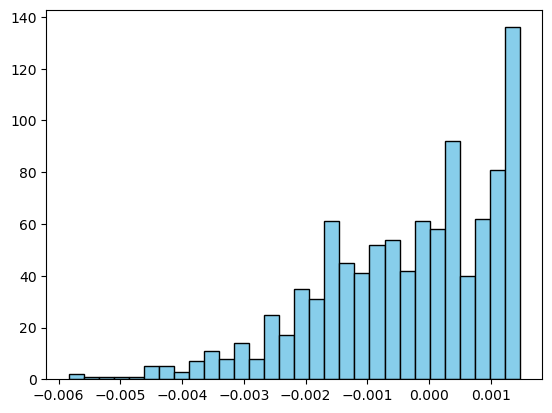

In [7]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')